# 1. KMeans test

In [4]:
import numpy as np
import pandas as pd

In [5]:
digits_train = pd.read_csv('d:/Data/Python2Kaggle/optdigits/optdigits.tra', header=None)
digits_test = pd.read_csv('d:/Data/Python2Kaggle/optdigits/optdigits.tes', header=None)

In [6]:
X_train = digits_train[np.arange(64)]
y_train = digits_train[64]
X_test = digits_test[np.arange(64)]
y_test = digits_test[64]

In [7]:
from sklearn.cluster import KMeans

In [8]:
kmeans = KMeans(n_clusters=10)

In [9]:
print(X_train)

      0   1   2   3   4   5   6   7   8   9  ...  54  55  56  57  58  59  60  \
0      0   1   6  15  12   1   0   0   0   7 ...   0   0   0   0   6  14   7   
1      0   0  10  16   6   0   0   0   0   7 ...   3   0   0   0  10  16  15   
2      0   0   8  15  16  13   0   0   0   1 ...   0   0   0   0   9  14   0   
3      0   0   0   3  11  16   0   0   0   0 ...   0   0   0   0   0   1  15   
4      0   0   5  14   4   0   0   0   0   0 ...  12   0   0   0   4  12  14   
5      0   0  11  16  10   1   0   0   0   4 ...   8   3   0   0  10  16  16   
6      0   0   1  11  13  11   7   0   0   0 ...   0   0   0   0   1  13   5   
7      0   0   8  10   8   7   2   0   0   1 ...   0   0   0   0   4  13   8   
8      0   0  15   2  14  13   2   0   0   0 ...   0   0   0   0  10  12   5   
9      0   0   3  13  13   2   0   0   0   6 ...  12   0   0   0   3  15  11   
10     0   0   6  14  14  16  16   8   0   0 ...   0   0   0   0  10  12   0   
11     0   0   0   3  16  11   1   0   0

In [10]:
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
y_pred = kmeans.predict(X_test)

In [12]:
from sklearn import metrics

In [13]:
print(metrics.adjusted_rand_score(y_test, y_pred))

0.6671867157826549


# 2. KMeans usage

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [16]:
x1 = np.array([1,2,3,1,5,6,5,5,6,7,8,9,7,9])
x2 = np.array([1,3,2,2,8,6,7,6,7,1,2,1,1,3])

In [17]:
X = zip(x1, x2)
for i in X:
  print(i)

(1, 1)
(2, 3)
(3, 2)
(1, 2)
(5, 8)
(6, 6)
(5, 7)
(5, 6)
(6, 7)
(7, 1)
(8, 2)
(9, 1)
(7, 1)
(9, 3)


In [18]:
X = zip(x1, x2)
list(X)

[(1, 1),
 (2, 3),
 (3, 2),
 (1, 2),
 (5, 8),
 (6, 6),
 (5, 7),
 (5, 6),
 (6, 7),
 (7, 1),
 (8, 2),
 (9, 1),
 (7, 1),
 (9, 3)]

In [19]:
# X = np.array(zip(x1, x2)).reshape(len(x1),2)
X = np.array(list(zip(x1, x2))).reshape(len(x1),2)

In [20]:
X

array([[1, 1],
       [2, 3],
       [3, 2],
       [1, 2],
       [5, 8],
       [6, 6],
       [5, 7],
       [5, 6],
       [6, 7],
       [7, 1],
       [8, 2],
       [9, 1],
       [7, 1],
       [9, 3]])

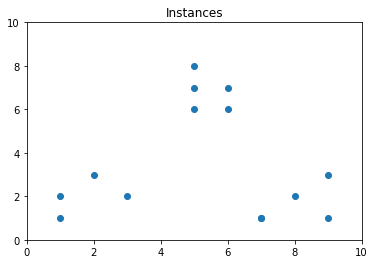

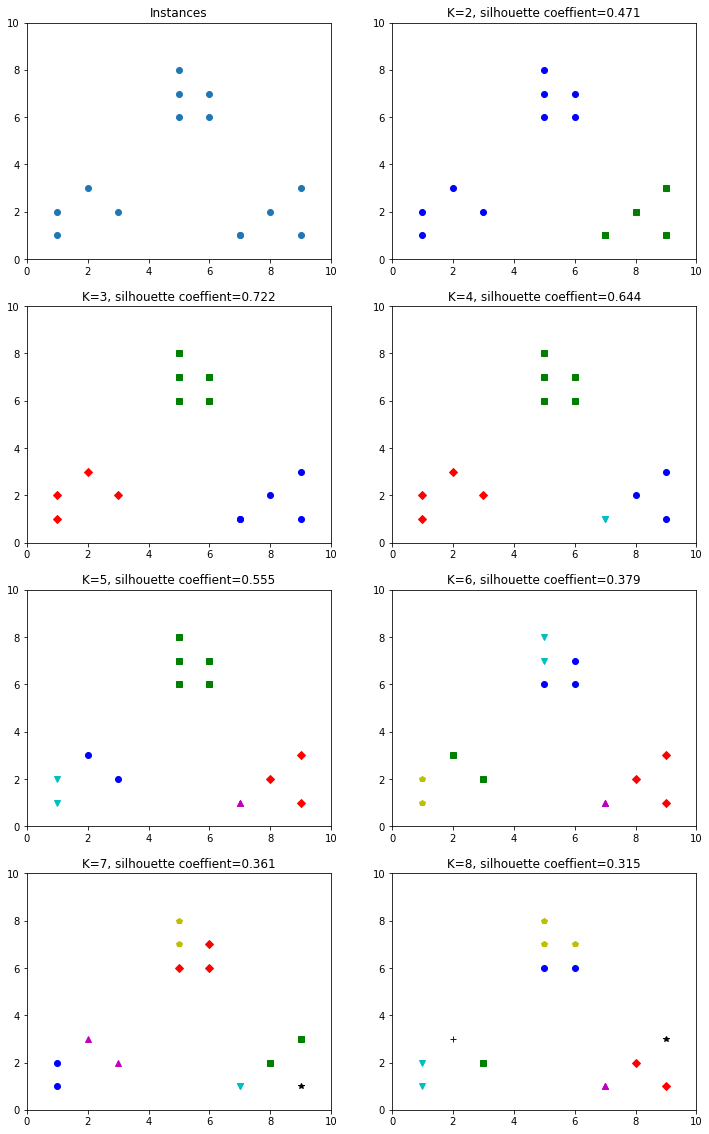

In [64]:
plt.figure(figsize=(12,20))

plt.subplot(4,2,1)
plt.xlim([0,10])
plt.ylim([0,10])
plt.title('Instances')
plt.scatter(x1,x2)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
markers = ['o', 's', 'D', 'v', '^', 'p', '*', '+']

clusters = [2,3,4,5,6,7,8]

subplot_counter = 1
sc_scores=[]

for t in clusters:
  subplot_counter += 1
  plt.subplot(4,2,subplot_counter)
  kmeans_model = KMeans(n_clusters=t).fit(X)
  sc_score = silhouette_score(X, kmeans_model.labels_, metric='euclidean')
  sc_scores.append(sc_score)
  for i,l in enumerate(kmeans_model.labels_):
    plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l], ls='None')
    plt.xlim([0,10])
    plt.ylim([0,10])
    plt.title('K=%s, silhouette coeffient=%0.03f' %(t, sc_score))

In [59]:
sc_scores

[0.47114752373147084,
 0.7215299149983971,
 0.644424904925249,
 0.5548170502705031,
 0.3423616285814178,
 0.36107663522931677,
 0.3153915867756277]

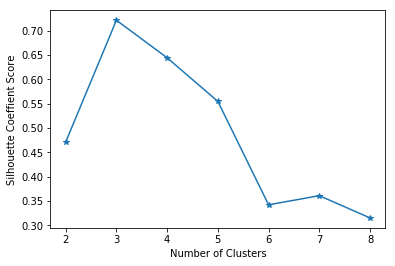

In [60]:
plt.figure()
plt.plot(clusters, sc_scores, '*-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coeffient Score')
plt.show()

# 3. Elbow method

In [66]:
from scipy.spatial.distance import cdist

In [69]:
cluster1 = np.random.uniform(0.5, 1.5, (2, 10))
cluster2 = np.random.uniform(5.5, 6.5, (2, 10))
cluster3 = np.random.uniform(3.0, 4.0, (2, 10))

In [76]:
X1 = np.hstack((cluster1, cluster2, cluster3)).T

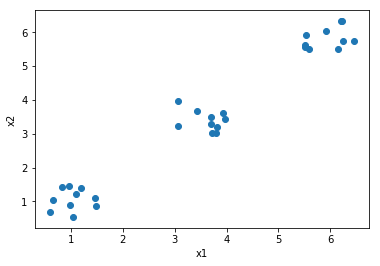

In [77]:
plt.scatter(X1[:,0], X1[:,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [81]:
K = range(1, 10)
meandistortions = []

In [82]:
for k in K:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X1)
  meandistortions.append(sum(np.min(cdist(X1, kmeans.cluster_centers_, 'euclidean'), axis = 1))/X1.shape[0])

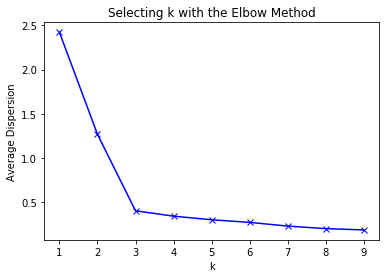

In [83]:
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Dispersion')
plt.title('Selecting k with the Elbow Method')
plt.show()